<a href="https://colab.research.google.com/github/Michael-Jimenez-C/Investigaci-n-de-operaciones/blob/main/pert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame({"Actividad":"1 2 3 4 5 6 7 8 9 10 11 12 13 14 15".split(" "),
                 "Tiempo":[40,30,30,40,40,60,40,50,30,50,5,30,30,30,10],
                 "dependencia":["0","0","0","0","0","0","0","0","0","0","0","2,3,4,5,6,7","8,9","10","1,11,12,13,14"]})

In [4]:
df

,Actividad,Tiempo,dependencia
0,1,40,0
1,2,30,0
2,3,30,0
3,4,40,0
4,5,40,0
5,6,60,0
6,7,40,0
7,8,50,0
8,9,30,0
9,10,50,0


In [62]:
class Nodo:
  def __init__(self,contenido):
    self.contenido=contenido
    self.padres=[]
    self.next=[]
  def agregar(self,nodo):
    if nodo not in self.next:
      nodo.padres.append(self)
      self.next.append(nodo)
  def __repr__(self):
    return str(self.contenido) if self.contenido!=None else ""

In [172]:
class Proyecto:
  def __init__(self,actividades,tiempos,dependencias):
    nodos=[Nodo({"actividad":"0",
         "t":0,
         "dep":None})]
    for i in range(len(actividades)):
      k={"actividad":actividades[i],
         "t":tiempos[i],
         "dep":dependencias[i].split(",")}
      nodos.append(Nodo(k))
    
    for i in nodos:
      for j in nodos:
        if i.contenido["dep"]!=None:
          if j.contenido["actividad"] in i.contenido["dep"]:
            j.agregar(i)
    self.nodos=nodos
  def rutaCritica(self) :
    for i,k in enumerate(self.nodos):
      k.contenido["tmax"]=np.inf
      k.contenido["tmin"]=0
      k.contenido["t0"]=0
      max=0

    for i in self.nodos:
      for j in i.next:
        j.contenido["tmin"]=np.maximum(j.contenido["tmin"],i.contenido["tmin"]+j.contenido["t"])
        j.contenido["t0"]=np.maximum(j.contenido["t0"],i.contenido["t0"]+i.contenido["t"])

        if len(j.next)==len([]):
          j.contenido["tmax"]=j.contenido["tmin"]
          j.contenido["TRC"]=j.contenido["tmax"]-j.contenido["tmin"]

          if max<j.contenido["tmax"]:
            max=j.contenido["tmax"]

            
    for i in reversed(self.nodos):
      for j in i.padres:
        j.contenido["tmax"]=np.minimum(j.contenido["tmax"],i.contenido["tmax"]-i.contenido["t"])
        j.contenido["TRC"]=j.contenido["tmax"]-j.contenido["tmin"]
    self.max=max

  def __gantc__(self,x):
    u=lambda x,l,s:np.piecewise(x, [x<l,(x>=l)*(x<=s),x>s],[lambda x: 0*x, lambda x: 1+0*x, lambda x: 0*x])
    f=[]
    for i in self.nodos:
      x_l=i.contenido["t0"]
      x_s=x_l+i.contenido["t"]
      f.append(u(x,x_l,x_s))
    return f
  def gant(self):
    x=np.linspace(0,self.max,self.max*2)
    f=self.__gantc__(x)

    for i in enumerate(f):
      plt.plot(x,i[1]*i[0],label=r"Actividad "+r"$"+str(i[0])+r"$")
    plt.yticks([i for i in range(0,len(f))])
    plt.ylabel("ACTIVIDAD")
    plt.xlabel("TIEMPO")
    plt.title("DIAGRAMA DE GANT")
    plt.grid()
    plt.tight_layout()
    return plt
  
  def digrama_recurso_vs_tiempo(self,asignacion_recurso,maximo_recurso):
    x=np.linspace(0,self.max,self.max*2)
    rec=[0]
    rec.extend(asignacion_recurso)
    f=self.__gantc__(x)
    y=sum([f[i]*rec[i] for i in range(len(f))])

    plt.plot(x,y)
    plt.plot(x,0*x+maximo_recurso)
    plt.xlabel("TIEMPO")
    plt.ylabel("RECURSO")   
    plt.title("RECURSO VS TIEMPO") 
    plt.grid()
    plt.tight_layout()
    return plt

In [173]:
s=Proyecto(df["Actividad"],df["Tiempo"],df["dependencia"])

In [174]:
s.rutaCritica()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

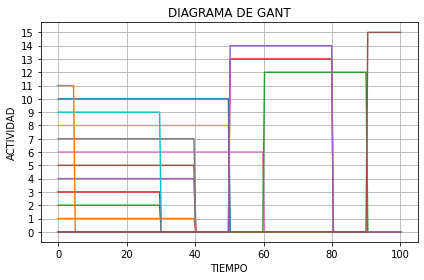

In [175]:
s.gant()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

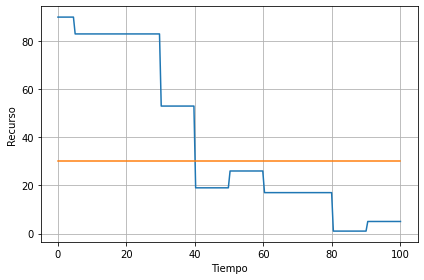

In [176]:
s.digrama_recurso_vs_tiempo([10,10,10,10,10,10,4,7,10,2,7,1,12,4,5],30)